In [1]:
# Import EDA libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

# Load the dataset
# URL for future reference
# url = 'https://beta.data.gov.sg/collections/177/datasets/d_2d493bdcc1d9a44828b6e71cb095b88d/view'

df = pd.read_csv('PriceRangeofHDBFlatsOffered.csv')

# Display the first few rows of the dataframe
print(df.head())

# Get a summary of the dataframe
print(df.info())

# Check for missing values
print(df.isnull().sum())

# Perform descriptive statistics
print(df.describe())


   financial_year         town room_type  min_selling_price  \
0            2008      Punggol    2-room              82000   
1            2008      Punggol    3-room             135000   
2            2008      Punggol    4-room             223000   
3            2008      Punggol    5-room             305000   
4            2008  Jurong West    3-room             142000   

   max_selling_price  min_selling_price_less_ahg_shg  \
0             107000                               0   
1             211000                               0   
2             327000                               0   
3             428000                               0   
4             160000                               0   

   max_selling_price_less_ahg_shg  
0                               0  
1                               0  
2                               0  
3                               0  
4                               0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 277 entries, 0 to 

In [2]:
%matplotlib inline

In [3]:
#checking room_type for weird result as 2-room seems to have duplicates
unique_values = df['room_type'].unique()
unique_values

array(['2-room', '3-room', '4-room', '5-room', '2-room '], dtype=object)

In [4]:
#found out some rows for 2-room has trailing space so proceed to strip the trailing space
df['room_type'] = df['room_type'].str.strip()

In [5]:
#double check to ensure rows with trailing space got corrected
unique_values = df['room_type'].unique()
unique_values

array(['2-room', '3-room', '4-room', '5-room'], dtype=object)

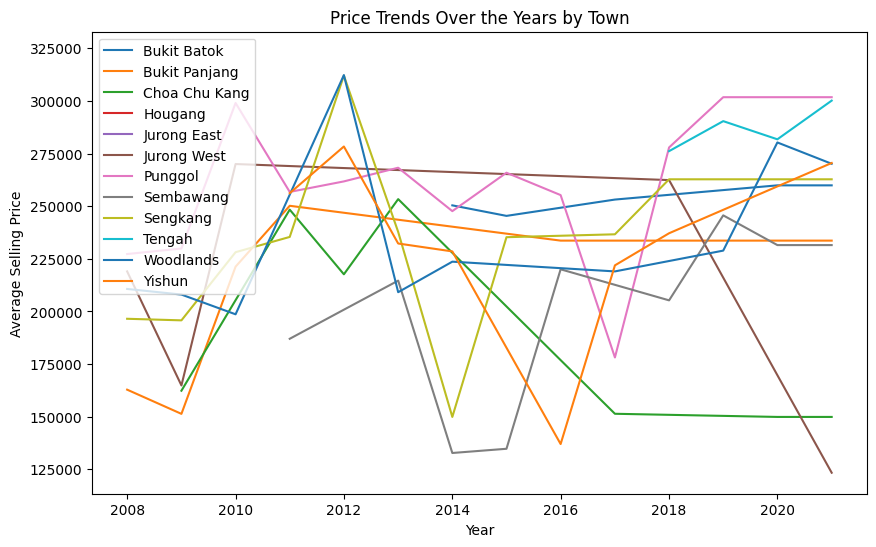

In [6]:
df['financial_year'] = pd.to_datetime(df['financial_year'], format='%Y')



# Calculate the average selling price for each year and town
df['average_selling_price'] = (df['min_selling_price'] + df['max_selling_price']) / 2
yearly_prices_by_town = df.groupby(['financial_year', 'town'])['average_selling_price'].mean().unstack()

# Interpolate missing values
yearly_prices_by_town = yearly_prices_by_town.interpolate(method='linear')

# Plot the price trends over the years by town using a line chart
plt.figure(figsize=(10, 6))
for town in yearly_prices_by_town.columns:
    plt.plot(yearly_prices_by_town.index, yearly_prices_by_town[town], label=town)
plt.title('Price Trends Over the Years by Town')
plt.xlabel('Year')
plt.ylabel('Average Selling Price')
plt.legend(loc='best')
plt.show()

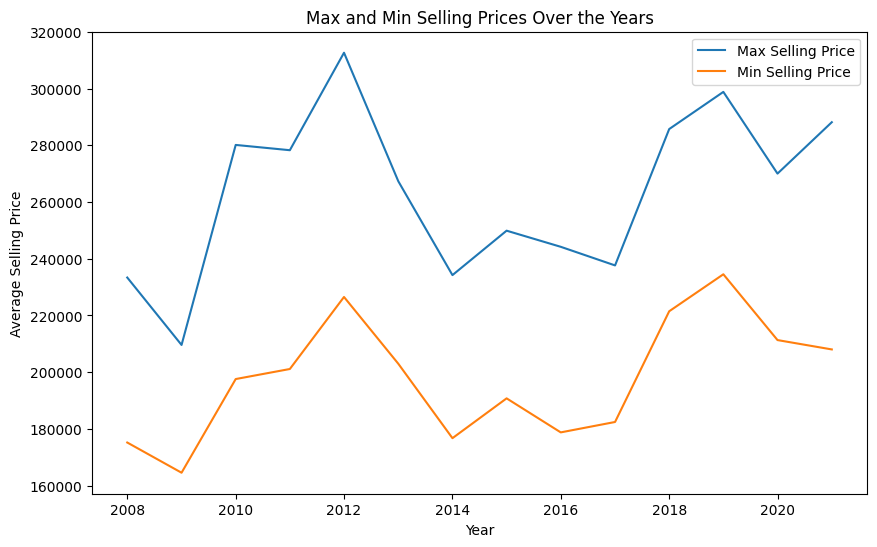

In [7]:
# Calculate the average maximum and minimum selling price for each year
yearly_max_prices = df.groupby('financial_year')['max_selling_price'].mean()
yearly_min_prices = df.groupby('financial_year')['min_selling_price'].mean()

# Plot the maximum and minimum selling prices over the years
plt.figure(figsize=(10, 6))
plt.plot(yearly_max_prices.index, yearly_max_prices, label='Max Selling Price')
plt.plot(yearly_min_prices.index, yearly_min_prices, label='Min Selling Price')
plt.title('Max and Min Selling Prices Over the Years')
plt.xlabel('Year')
plt.ylabel('Average Selling Price')
plt.legend(loc='best')
plt.show()

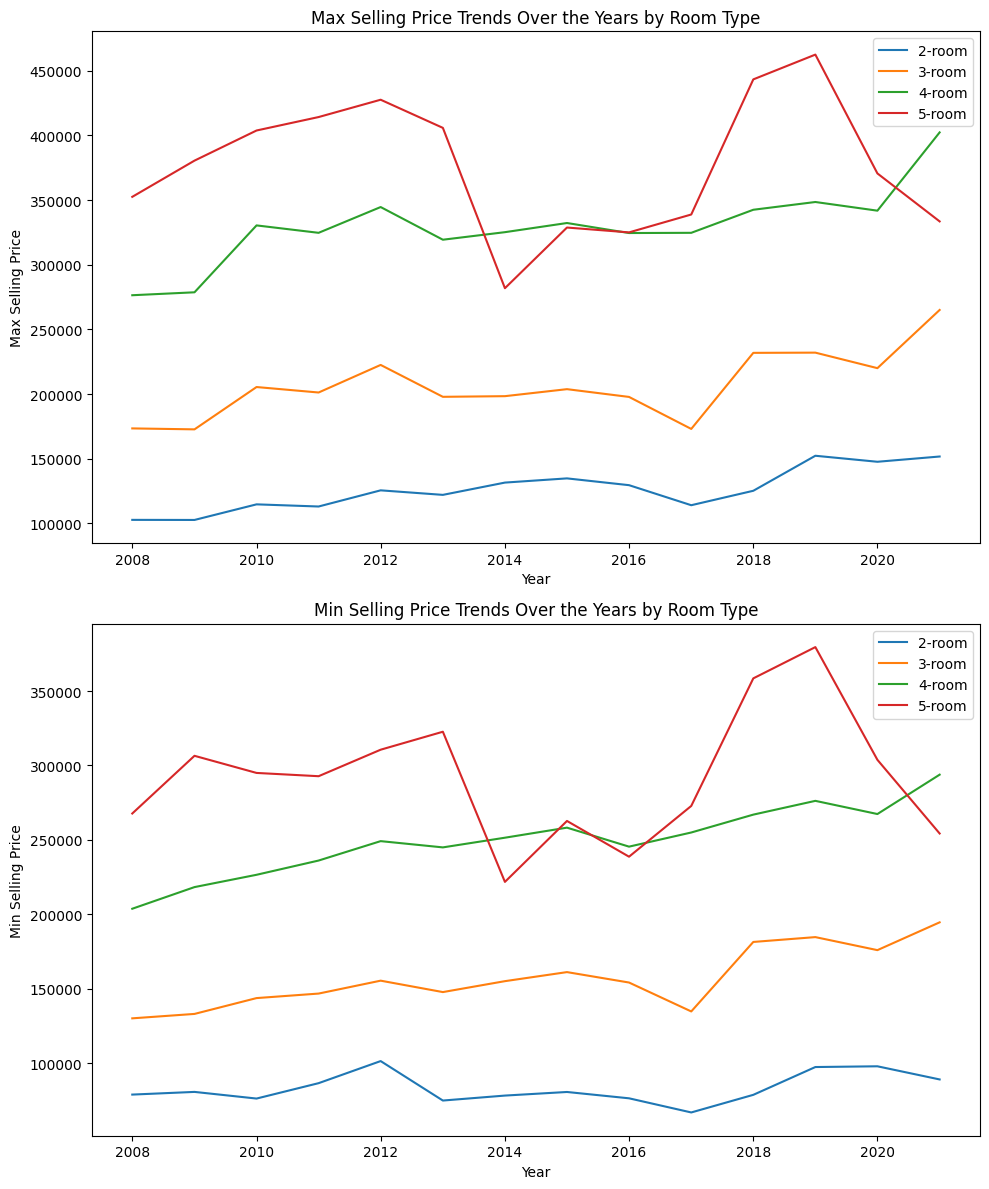

In [8]:
# Calculate the average maximum and minimum selling price for each year and room type
yearly_max_prices_by_room_type = df.groupby(['financial_year', 'room_type'])['max_selling_price'].mean().unstack()
yearly_min_prices_by_room_type = df.groupby(['financial_year', 'room_type'])['min_selling_price'].mean().unstack()

# Plot the maximum and minimum selling price trends over the years by room type
fig, ax = plt.subplots(2, 1, figsize=(10, 12))

for room_type in yearly_max_prices_by_room_type.columns:
    ax[0].plot(yearly_max_prices_by_room_type.index, yearly_max_prices_by_room_type[room_type], label=room_type)
ax[0].set_title('Max Selling Price Trends Over the Years by Room Type')
ax[0].set_xlabel('Year')
ax[0].set_ylabel('Max Selling Price')
ax[0].legend(loc='best')

for room_type in yearly_min_prices_by_room_type.columns:
    ax[1].plot(yearly_min_prices_by_room_type.index, yearly_min_prices_by_room_type[room_type], label=room_type)
ax[1].set_title('Min Selling Price Trends Over the Years by Room Type')
ax[1].set_xlabel('Year')
ax[1].set_ylabel('Min Selling Price')
ax[1].legend(loc='best')

plt.tight_layout()
plt.show()

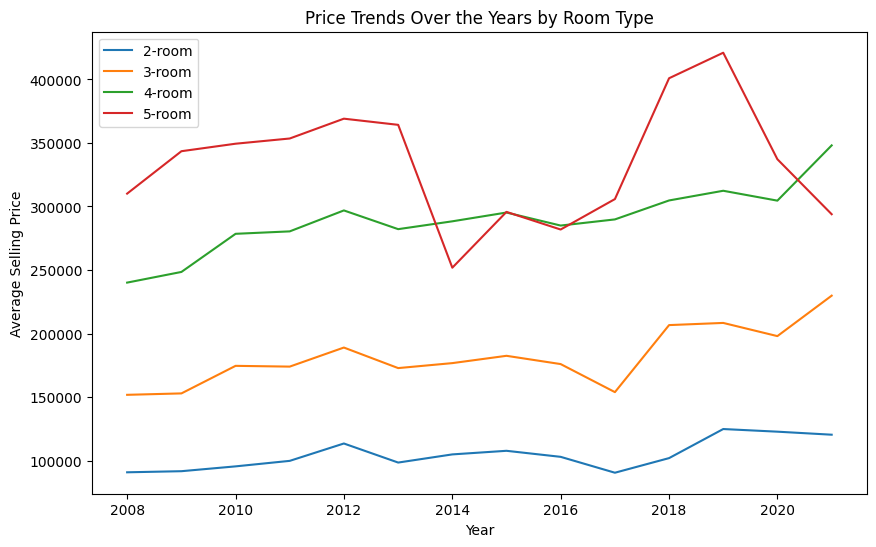

In [9]:
# Calculate the average selling price for each year and room type
df['average_selling_price'] = (df['min_selling_price'] + df['max_selling_price']) / 2
yearly_prices_by_room_type = df.groupby(['financial_year', 'room_type'])['average_selling_price'].mean().unstack()

# Plot the price trends over the years by room type
plt.figure(figsize=(10, 6))
for room_type in yearly_prices_by_room_type.columns:
    plt.plot(yearly_prices_by_room_type.index, yearly_prices_by_room_type[room_type], label=room_type)
plt.title('Price Trends Over the Years by Room Type')
plt.xlabel('Year')
plt.ylabel('Average Selling Price')
plt.legend(loc='best')
plt.show()

In [10]:
#read in HDB Resale price price data
df_price2010 = pd.read_csv('ResaleFlatPricesBasedonApprovalDate2000Feb2012.csv')
df_price2012 = pd.read_csv('ResaleFlatPricesBasedonRegistrationDateFromMar2012toDec2014.csv')
df_price2015 = pd.read_csv('ResaleFlatPricesBasedonRegistrationDateFromJan2015toDec2016.csv')
df_price2017 = pd.read_csv('ResaleflatpricesbasedonregistrationdatefromJan2017onwards.csv')
#read in CPI data
df_cpi = pd.read_csv('CPI20082023.csv')

In [11]:
# Merge dataframes
df_prices = pd.concat([df_price2010, df_price2012, df_price2015], sort=False)
df_prices = pd.concat([df_prices, df_price2017], axis=0, ignore_index=True, sort=False)

df_prices['month'] = pd.to_datetime(df_prices['month']) # to datetime

In [12]:
# Compute HDB Resale Price Adjusted for Inflation Using Consumer Price Index for Housing & Utilities
# Strip string due to trailing space first
df_cpi['year_month'] = df_cpi['year_month'].str.strip()
df_cpi['month'] = pd.to_datetime(df_cpi['year_month'], format='%Y %b') # to datetime
#merge with main price dataframe
df_prices = df_prices.merge(df_cpi, on='month', how='left') 

In [13]:
# get cpi-adjusted resale price
# https://people.duke.edu/~rnau/411infla.htm
df_prices['real_price'] = (df_prices['resale_price'] / df_prices['cpi_all']) * 100 

C:\Users\LAIW0\AppData\Roaming\Python\Python39\site-packages\matplotlib\patches.py:2867: RuntimeWarning: divide by zero encountered in double_scalars
  f1 = self.rad / d1
C:\Users\LAIW0\AppData\Roaming\Python\Python39\site-packages\matplotlib\patches.py:2871: RuntimeWarning: invalid value encountered in double_scalars
  vertices.extend([(cx + dx1 * f1, cy + dy1 * f1),


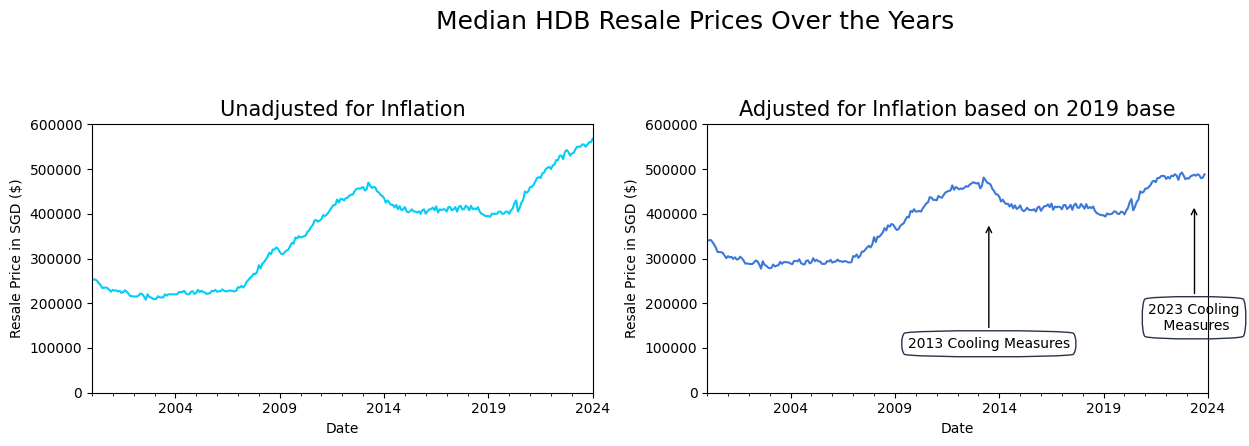

In [14]:
# Plot Median Resale Prices Over the Years

# Unadjusted
fig = plt.figure(figsize=(14,4.5))
fig.suptitle('Median HDB Resale Prices Over the Years', fontsize=18)
ax1 = fig.add_subplot(121)
df_prices.groupby('month')[['resale_price']].median().plot(ax=ax1, color='#00cef6', legend=None)
ax1.set_xlabel('Date'), ax1.set_ylabel('Resale Price in SGD ($)'), ax1.set_ylim(0, 600000), ax1.set_title('Unadjusted for Inflation', size=15)

# Adjusted
# https://jakevdp.github.io/PythonDataScienceHandbook/04.09-text-and-annotation.html
ax2 = fig.add_subplot(122)
df_prices.groupby('month')[['real_price']].median().plot(ax=ax2, color='#3c78d8', legend=None)
ax2.set_xlabel('Date'), ax2.set_ylabel('Resale Price in SGD ($)'), ax2.set_ylim(0, 600000), ax2.set_title('Adjusted for Inflation based on 2019 base',size=15)
ax2.annotate('2013 Cooling Measures', xy=('2013-07-01',380000), xycoords='data', 
    bbox=dict(boxstyle="round4,pad=.5", fc="none", ec="#28324a"), xytext=(0,-90), textcoords='offset points', ha='center',
    arrowprops=dict(arrowstyle="->", connectionstyle="angle,angleA=0,angleB=90,rad=20"))
ax2.annotate('2023 Cooling\n Measures', xy=('2023-05-01',420000), xycoords='data', 
    bbox=dict(boxstyle="round4,pad=.5", fc="none", ec="#28324a"), xytext=(0,-90), textcoords='offset points', ha='center',
    arrowprops=dict(arrowstyle="->", connectionstyle="angle,angleA=0,angleB=90,rad=20"))    
plt.tight_layout(rect=[0, 0, 0.9, 0.9]) 

C:\Users\LAIW0\AppData\Roaming\Python\Python39\site-packages\matplotlib\patches.py:2867: RuntimeWarning: divide by zero encountered in double_scalars
  f1 = self.rad / d1
C:\Users\LAIW0\AppData\Roaming\Python\Python39\site-packages\matplotlib\patches.py:2871: RuntimeWarning: invalid value encountered in double_scalars
  vertices.extend([(cx + dx1 * f1, cy + dy1 * f1),


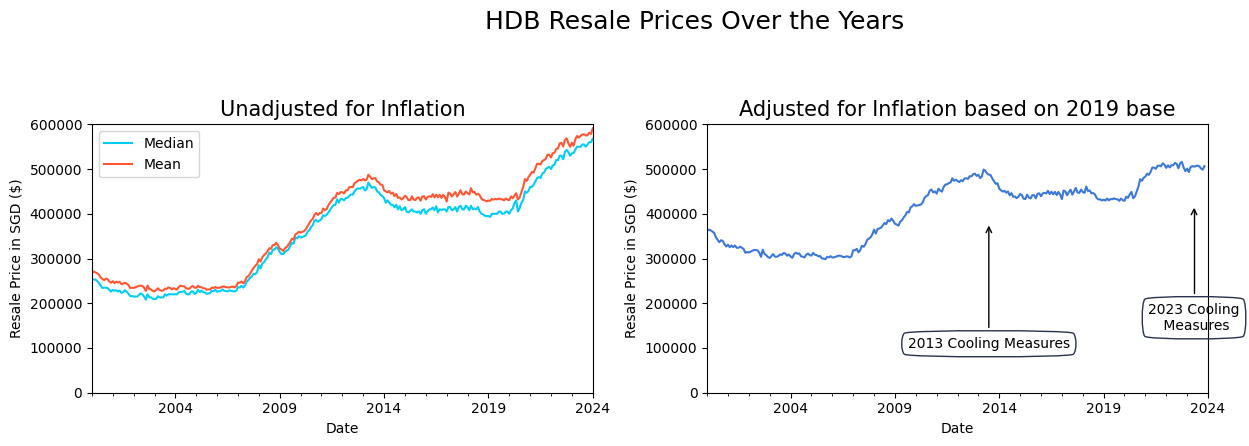

In [15]:
# Plot Median Resale Prices Over the Years
fig = plt.figure(figsize=(14,4.5))
fig.suptitle('HDB Resale Prices Over the Years', fontsize=18)
ax1 = fig.add_subplot(121)

# Plot median resale price
df_prices.groupby('month')[['resale_price']].median().plot(ax=ax1, color='#00cef6', label='Median')
ax1.set_ylabel('Resale Price in SGD ($)')

# Plot mean resale price
df_prices.groupby('month')[['resale_price']].mean().plot(ax=ax1, color='#ff5733', label='Mean')
ax1.legend(labels=['Median', 'Mean'])

ax1.set_xlabel('Date'), ax1.set_ylim(0, 600000), ax1.set_title('Unadjusted for Inflation', size=15)

# Adjusted
# https://jakevdp.github.io/PythonDataScienceHandbook/04.09-text-and-annotation.html
ax2 = fig.add_subplot(122)
df_prices.groupby('month')[['real_price']].mean().plot(ax=ax2, color='#3c78d8', legend=None)
ax2.set_xlabel('Date'), ax2.set_ylabel('Resale Price in SGD ($)'), ax2.set_ylim(0, 600000), ax2.set_title('Adjusted for Inflation based on 2019 base',size=15)
ax2.annotate('2013 Cooling Measures', xy=('2013-07-01',380000), xycoords='data', 
    bbox=dict(boxstyle="round4,pad=.5", fc="none", ec="#28324a"), xytext=(0,-90), textcoords='offset points', ha='center',
    arrowprops=dict(arrowstyle="->", connectionstyle="angle,angleA=0,angleB=90,rad=20"))
 
ax2.annotate('2023 Cooling\n Measures', xy=('2023-05-01',420000), xycoords='data', 
    bbox=dict(boxstyle="round4,pad=.5", fc="none", ec="#28324a"), xytext=(0,-90), textcoords='offset points', ha='center',
    arrowprops=dict(arrowstyle="->", connectionstyle="angle,angleA=0,angleB=90,rad=20"))  
plt.tight_layout(rect=[0, 0, 0.9, 0.9]) 

plt.show()


C:\Users\LAIW0\AppData\Roaming\Python\Python39\site-packages\matplotlib\patches.py:2867: RuntimeWarning: divide by zero encountered in double_scalars
  f1 = self.rad / d1
C:\Users\LAIW0\AppData\Roaming\Python\Python39\site-packages\matplotlib\patches.py:2871: RuntimeWarning: invalid value encountered in double_scalars
  vertices.extend([(cx + dx1 * f1, cy + dy1 * f1),


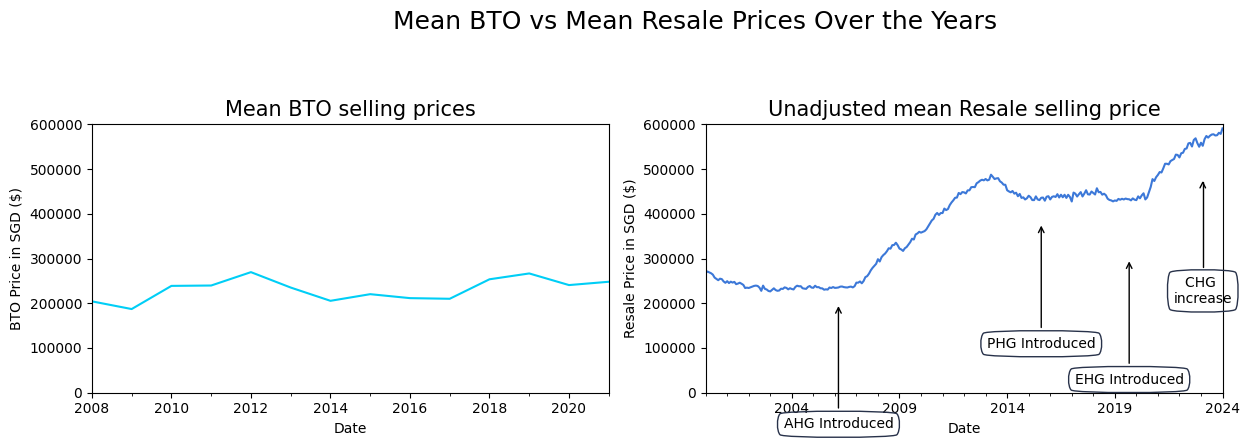

In [16]:
fig = plt.figure(figsize=(14,4.5))
fig.suptitle('Mean BTO vs Mean Resale Prices Over the Years', fontsize=18)
ax1 = fig.add_subplot(121)
# Create a new column 'average_selling_price' as the average of 'min_selling_price' and 'max_selling_price'
df['average_selling_price'] = (df['min_selling_price'] + df['max_selling_price']) / 2

# Calculate the average price for each year
yearly_avg_prices = df.groupby('financial_year')['average_selling_price'].mean().plot(ax=ax1, color='#00cef6', label='Mean BTO selling prices')
ax1.set_xlabel('Date'), ax1.set_ylabel('BTO Price in SGD ($)'), ax1.set_ylim(0, 600000), ax1.set_title('Mean BTO selling prices',size=15)
ax2 = fig.add_subplot(122)
df_prices.groupby('month')[['resale_price']].mean().plot(ax=ax2, color='#3c78d8', legend=None)
ax2.set_xlabel('Date'), ax2.set_ylabel('Resale Price in SGD ($)'), ax2.set_ylim(0, 600000), ax2.set_title('Unadjusted mean Resale selling price',size=15)

ax2.annotate('AHG Introduced', xy=('2006-03-01',200000), xycoords='data', 
    bbox=dict(boxstyle="round4,pad=.5", fc="none", ec="#28324a"), xytext=(0,-90), textcoords='offset points', ha='center',
    arrowprops=dict(arrowstyle="->", connectionstyle="angle,angleA=0,angleB=90,rad=20"))
ax2.annotate('PHG Introduced', xy=('2015-08-01',380000), xycoords='data', 
    bbox=dict(boxstyle="round4,pad=.5", fc="none", ec="#28324a"), xytext=(0,-90), textcoords='offset points', ha='center',
    arrowprops=dict(arrowstyle="->", connectionstyle="angle,angleA=0,angleB=90,rad=20"))
ax2.annotate('EHG Introduced', xy=('2019-09-01',300000), xycoords='data', 
    bbox=dict(boxstyle="round4,pad=.5", fc="none", ec="#28324a"), xytext=(0,-90), textcoords='offset points', ha='center',
    arrowprops=dict(arrowstyle="->", connectionstyle="angle,angleA=0,angleB=90,rad=20"))  
ax2.annotate('CHG \nincrease', xy=('2023-02-01',480000), xycoords='data', 
    bbox=dict(boxstyle="round4,pad=.5", fc="none", ec="#28324a"), xytext=(0,-90), textcoords='offset points', ha='center',
    arrowprops=dict(arrowstyle="->", connectionstyle="angle,angleA=0,angleB=90,rad=20"))  
plt.tight_layout(rect=[0, 0, 0.9, 0.9]) 

plt.show()

We can see the grant introduction precedes most of the price inceases in HDB resale flats. This could be due to excellent policy foresight or that the market is actually pricing in the grants and raising prices knowing the buyers would be ready to pay more.

C:\Users\LAIW0\AppData\Local\Temp\ipykernel_10684\2920856391.py:13: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_grouped = df_prices.groupby(["flat_type_combined", "year"]).mean()  # Calculate the average price per combined flat type and year


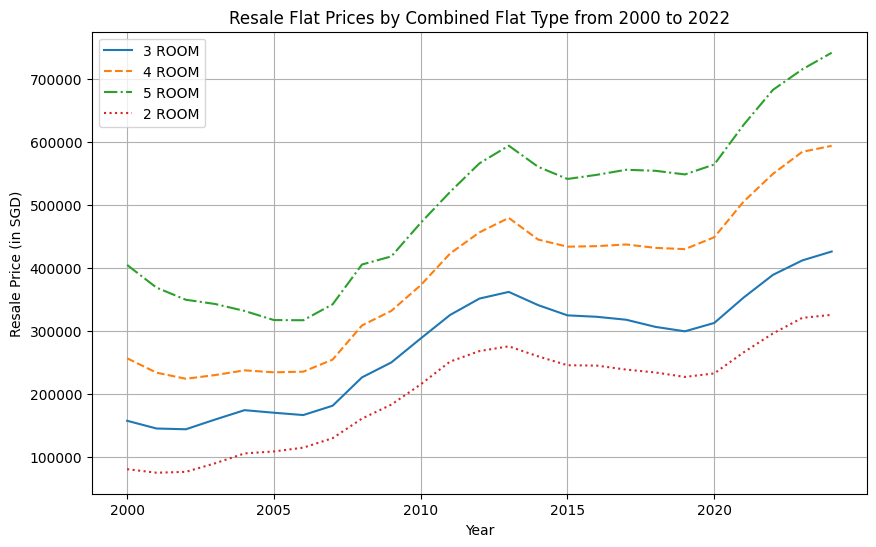

In [17]:

# Group the data by flat type and year
df_prices["year"] = pd.DatetimeIndex(df_prices["month"]).year  # Extract the year from the month column



# Combine "1 ROOM" with "2 ROOM" and "EXECUTIVE" with "5 ROOM" flat types
df_prices["flat_type_combined"] = df_prices["flat_type"].replace({"1 ROOM": "2 ROOM", "EXECUTIVE": "5 ROOM"})


# Exclude "1 ROOM" and "MULTI-GENERATION" flat types
df_prices = df_prices[~df_prices["flat_type"].isin(["MULTI-GENERATION"])]

df_grouped = df_prices.groupby(["flat_type_combined", "year"]).mean()  # Calculate the average price per combined flat type and year



# Plotting Improvements
plt.figure(figsize=(10, 6))  # Adjust the size as needed
plt.grid(True)

flat_types_combined = df_prices["flat_type_combined"].unique()  # Get the unique combined flat types
line_styles = ['-', '--', '-.', ':']  # Add more styles if needed

for i, flat_type_combined in enumerate(flat_types_combined):
    df_flat_type_combined = df_grouped.loc[flat_type_combined]  # Filter the data by combined flat type
    plt.plot(df_flat_type_combined.index, df_flat_type_combined["resale_price"], label=flat_type_combined, linestyle=line_styles[i % len(line_styles)])

plt.xlabel("Year")
plt.ylabel("Resale Price (in SGD)")  # Add units if applicable
plt.title("Resale Flat Prices by Combined Flat Type from 2000 to 2022")
plt.legend()
plt.xticks(df_flat_type_combined.index[::5])  # Adjust to display every 5 years for better readability
plt.show()

In [18]:
df_income = pd.read_csv('IncomebyDwelling.csv')

In [19]:
df_income.head()

,Year,HDB 1- & 2- Room Flats1/,HDB 3-Room Flats,HDB 4-Room Flats,HDB 5-Room & Executive Flats,Condominiums & Other Apartments,Landed Properties
0,2022,3189,6374,9220,12390,19936,25193
1,2021,2829,6132,8685,11784,18483,23951
2,2020,2667,5728,8347,11392,19254,26420
3,2019,2565,5859,8459,11375,19529,25978
4,2018,2460,5767,8248,11392,19116,25724


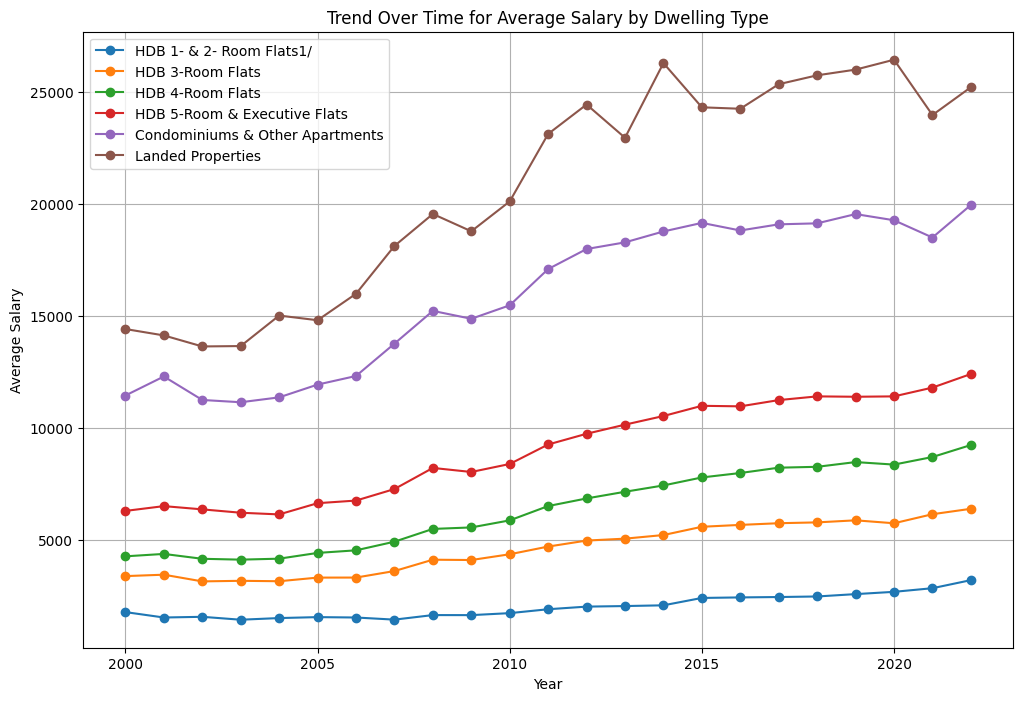

In [20]:
# Plot multiple lines for each dwelling type
plt.figure(figsize=(12, 8))

for column in df_income.columns[1:]:
    plt.plot(df_income['Year'], df_income[column], marker='o', label=column)

plt.title('Trend Over Time for Average Salary by Dwelling Type')
plt.xlabel('Year')
plt.ylabel('Average Salary')
plt.legend(loc='best')
plt.grid(True)
plt.show()

C:\Users\LAIW0\AppData\Local\Temp\ipykernel_10684\2116195916.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_resale_grouped = df_prices.groupby(["flat_type_combined", "year"]).mean()  # Calculate the average price per combined flat type and year


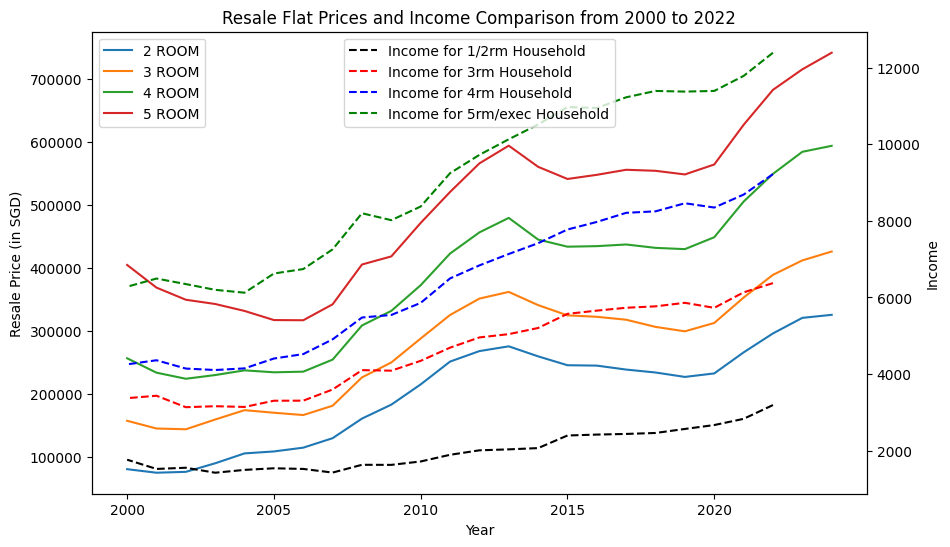

In [21]:
# Combine "1 ROOM" with "2 ROOM" and "EXECUTIVE" with "5 ROOM" flat types
df_prices["flat_type_combined"] = df_prices["flat_type"].replace({"1 ROOM": "2 ROOM", "EXECUTIVE": "5 ROOM"})

# Exclude "1 ROOM" and "MULTI-GENERATION" flat types
df_resale = df_prices[~df_prices["flat_type"].isin(["1 ROOM", "MULTI-GENERATION"])]


# Group the data by flat type and year
df_prices["year"] = pd.DatetimeIndex(df_prices["month"]).year  # Extract the year from the month column
df_resale_grouped = df_prices.groupby(["flat_type_combined", "year"]).mean()  # Calculate the average price per combined flat type and year
# Plotting Improvements
fig, ax1 = plt.subplots(figsize=(10, 6))


# Plot Resale Prices on the left y-axis
for i, flat_type_combined in enumerate(df_resale_grouped.index.get_level_values("flat_type_combined").unique()):
    try:
        df_flat_type_combined = df_resale_grouped.loc[flat_type_combined]  # Filter the data by combined flat type
        ax1.plot(df_flat_type_combined.index, df_flat_type_combined["resale_price"], label=flat_type_combined)
    except KeyError:
        continue

ax1.set_xlabel("Year")
ax1.set_ylabel("Resale Price (in SGD)")
ax1.set_title("Resale Flat Prices and Income Comparison from 2000 to 2022")
ax1.legend(loc="upper left")

# Create a second y-axis for the income data
ax2 = ax1.twinx()
ax2.plot(df_income["Year"], df_income["HDB 1- & 2- Room Flats1/"], label="Income for 1/2rm Household", linestyle="--", color="black")
ax2.plot(df_income["Year"], df_income["HDB 3-Room Flats"], label="Income for 3rm Household", linestyle="--", color="red")
ax2.plot(df_income["Year"], df_income["HDB 4-Room Flats"], label="Income for 4rm Household", linestyle="--", color="blue")
ax2.plot(df_income["Year"], df_income["HDB 5-Room & Executive Flats"], label="Income for 5rm/exec Household", linestyle="--", color="green")

ax2.set_ylabel("Income")
ax2.legend(loc="upper center")

plt.xticks(df_flat_type_combined.index.get_level_values("year")[::5])
plt.show()

In [22]:
# Rename the column in income_df to match flat_type
df_income = df_income.rename(columns={"HDB 1- & 2- Room Flats1/": "2 ROOM"})
df_income = df_income.rename(columns={"HDB 3-Room Flats": "3 ROOM"})
df_income = df_income.rename(columns={"HDB 4-Room Flats": "4 ROOM"})
df_income = df_income.rename(columns={"HDB 5-Room & Executive Flats": "5 ROOM"})


In [23]:
df_income.head()

,Year,2 ROOM,3 ROOM,4 ROOM,5 ROOM,Condominiums & Other Apartments,Landed Properties
0,2022,3189,6374,9220,12390,19936,25193
1,2021,2829,6132,8685,11784,18483,23951
2,2020,2667,5728,8347,11392,19254,26420
3,2019,2565,5859,8459,11375,19529,25978
4,2018,2460,5767,8248,11392,19116,25724


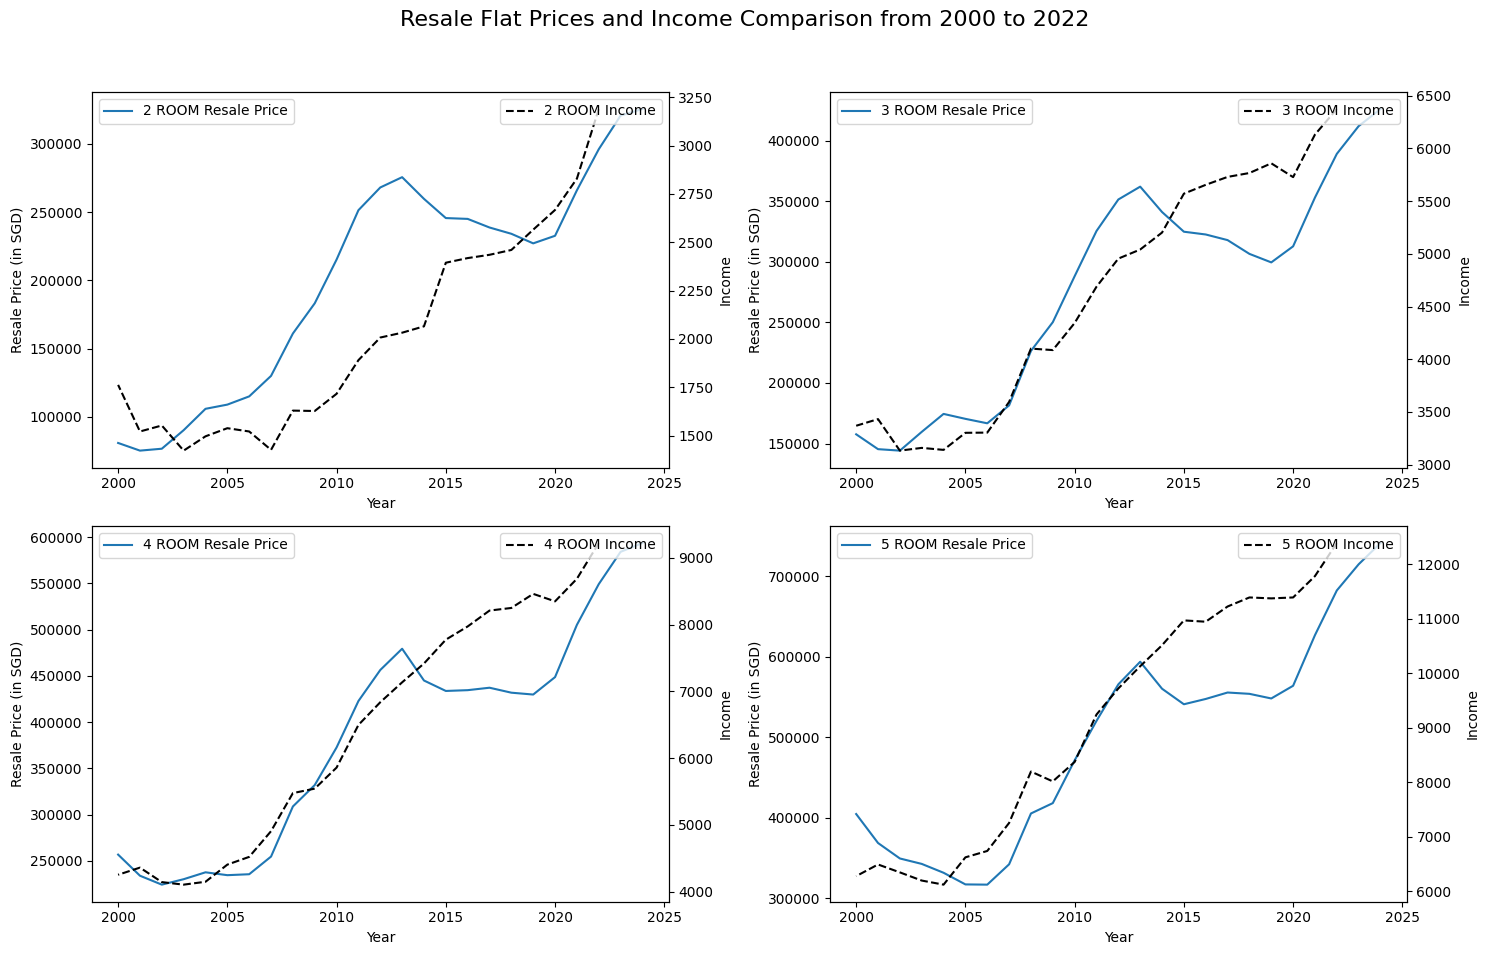

In [24]:
# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))
fig.suptitle("Resale Flat Prices and Income Comparison from 2000 to 2022", fontsize=16)

flat_types_combined = df_resale_grouped.index.get_level_values("flat_type_combined").unique()
line_styles = ['-', '--', '-.', ':']

for i, flat_type_combined in enumerate(flat_types_combined):
    ax = axes[i // 2, i % 2]

    try:
        df_flat_type_combined = df_resale_grouped.loc[flat_type_combined]  # Filter the data by combined flat type
        ax.plot(df_flat_type_combined.index, df_flat_type_combined["resale_price"], label=f"{flat_type_combined} Resale Price", linestyle="-")
        ax.set_xlabel("Year")
        ax.set_ylabel("Resale Price (in SGD)")
        ax.legend(loc="upper left")

        # Create a second y-axis for the income data
        ax2 = ax.twinx()
        ax2.plot(df_income["Year"], df_income.iloc[:, i + 1], label=f"{flat_type_combined} Income", linestyle="--", color="black")
        ax2.set_ylabel("Income")
        ax2.legend(loc="upper right")
        

    except KeyError:
        # Handle the case when the combined flat type is not present in the grouped data
        continue

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

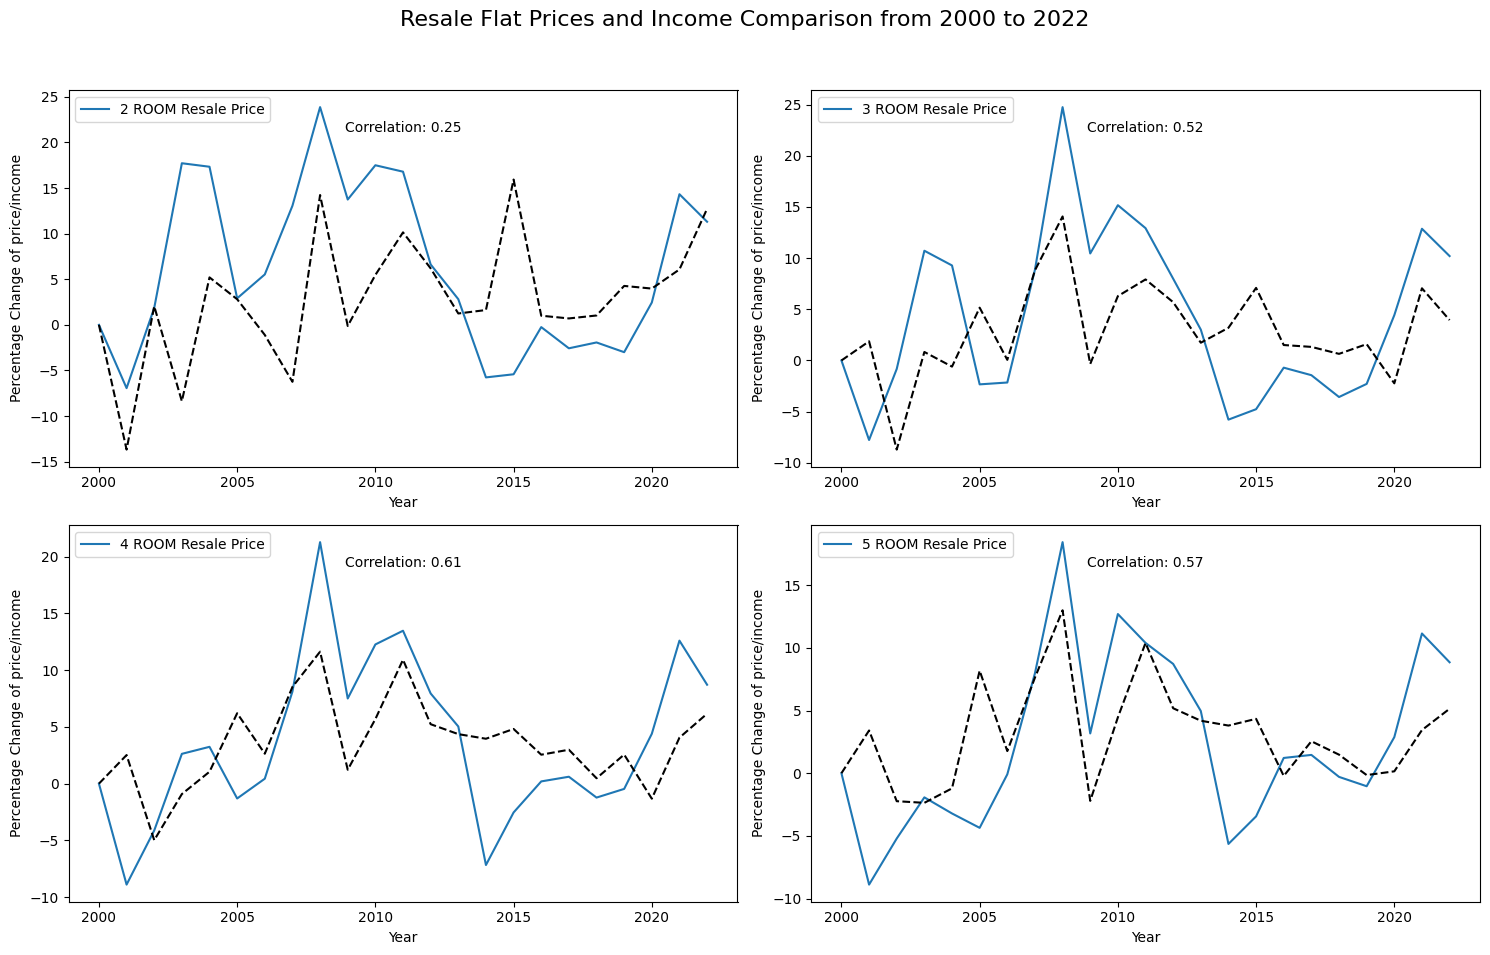

In [25]:
# Find the common years between the two datasets
common_years = list(set(df_resale_grouped.index.get_level_values("year")) & set(df_income["Year"]))

# Filter the data to include only common years
df_resale_grouped_common = df_resale_grouped[df_resale_grouped.index.get_level_values("year").isin(common_years)]
df_income_common = df_income[df_income["Year"].isin(common_years)]

# Sort df_income_common by the "Year" column in ascending order
df_income_common = df_income_common.sort_values(by="Year")

# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))
fig.suptitle("Resale Flat Prices and Income Comparison from 2000 to 2022", fontsize=16)

flat_types_combined = df_resale_grouped.index.get_level_values("flat_type_combined").unique()
line_styles = ['-', '--', '-.', ':']

for i, flat_type_combined in enumerate(flat_types_combined):
    ax = axes[i // 2, i % 2]

    try:
        df_flat_type_combined = df_resale_grouped_common.loc[flat_type_combined]  # Filter the data by combined flat type

        # Calculate percentage change for both datasets
        resale_price_pct_change = df_flat_type_combined["resale_price"].pct_change() * 100
        income_pct_change = df_income_common.iloc[:, i + 1].pct_change() * 100
        resale_price_pct_change = resale_price_pct_change.fillna(0)
        income_pct_change = income_pct_change.fillna(0)

        ax.plot(df_flat_type_combined.index, resale_price_pct_change, label=f"{flat_type_combined} Resale Price", linestyle="-")
        ax.set_xlabel("Year")
        ax.set_ylabel("Percentage Change of price/income")
        ax.legend(loc="upper left")

        # Create a second y-axis for the income data
        ax2 = ax
        ax2.plot(df_income_common["Year"], income_pct_change, label=f"{flat_type_combined} Income", linestyle="--", color="black")
        # ax2.set_ylabel("Income Percentage Change")
        # ax2.legend(loc="upper right")
        # Calculate and display the correlation coefficient
        correlation_coefficient, _ = pearsonr(resale_price_pct_change.dropna(), income_pct_change.dropna())
        ax.text(0.5, 0.9, f'Correlation: {correlation_coefficient:.2f}', horizontalalignment='center', verticalalignment='center', transform=ax.transAxes)

    except KeyError:
        # Handle the case when the combined flat type is not present in the grouped data
        continue

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

Percentage change is used to ensure that both price and income are scaled or normalized for a proper comparison and that the correlation can be calculated. We see that there is a certain correlation between income and resale price which could mean that the increase in income could have been a contributing factor to the rising price. However the rise in resale flat price has a higher magnitude which shows that the increase is higher as compared to the salary increase. This is where grants can come into the picture and make up the difference. 